Erste Einblicke in
-  die Tesla Aktie
-  Moving Average Crossover
-  Candlestick Charts

In [1]:
%matplotlib notebook
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib import style
import pandas_datareader.data as web

In [2]:
style.use('ggplot')

In [3]:
start = dt.datetime(2000, 1, 1)
end = dt.datetime.now()

In [4]:
df = web.DataReader("TSLA", 'morningstar', start, end)
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df = df.drop("Symbol", axis=1)
df.to_csv('tesla.csv')

In [5]:
df = pd.read_csv('tesla.csv', parse_dates=['Date'], index_col=['Date'])
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2010-06-29,23.89,25.0000,17.54,19.00,18783276
2010-06-30,23.83,30.4192,23.30,25.96,17194394
2010-07-01,21.96,25.9200,20.27,25.00,8216789
2010-07-02,19.20,23.1000,18.71,23.00,5135795
2010-07-05,19.20,19.2000,19.20,19.20,0


### Trading-Strategie: Moving Average Crossover

Was ist ein Moving Average?
-  Zu Deutsch ein gleitender Mittelwert oder gleitender Durchschnitt.
-  Modell zur Glättung von Zeit- bzw. Datenreihen.
-  Es ist eine Abfolge von Durchschnittswerten, die von aufeinanderfolgenden, gleichgroßen, überlappenden Segmenten einer Reihe von Datenwerten abgeleitet werden.

Was ist ein Moving Average Crossover?
-  Zwei Moving Averages mit unterschiedlicher Größe werden zeitlich miteinander verglichen.
-  Wenn der kurzfristige Durchschnitt den langfristigen Durchschnitt kreuzt und darüber steigt wird ein Kaufsignal der Aktie generiert. Analog entsteht ein Verkaufssignal, wenn der kurzfristige Durchschnitt den langfristigen Durchnitt überschneidet und dann darunter liegt.

In [14]:
df['100MA'] = df['Close'].rolling(window=100, min_periods=0).mean()
df['50MA'] = df['Close'].rolling(window=50, min_periods=0).mean()

In [7]:
df.head()

,Close,High,Low,Open,Volume,100MA,60MA
Date,,,,,,,
2010-06-29,23.89,25.0000,17.54,19.00,18783276,23.890000,23.890000
2010-06-30,23.83,30.4192,23.30,25.96,17194394,23.860000,23.860000
2010-07-01,21.96,25.9200,20.27,25.00,8216789,23.226667,23.226667
2010-07-02,19.20,23.1000,18.71,23.00,5135795,22.220000,22.220000
2010-07-05,19.20,19.2000,19.20,19.20,0,21.616000,21.616000


<IPython.core.display.Javascript object>


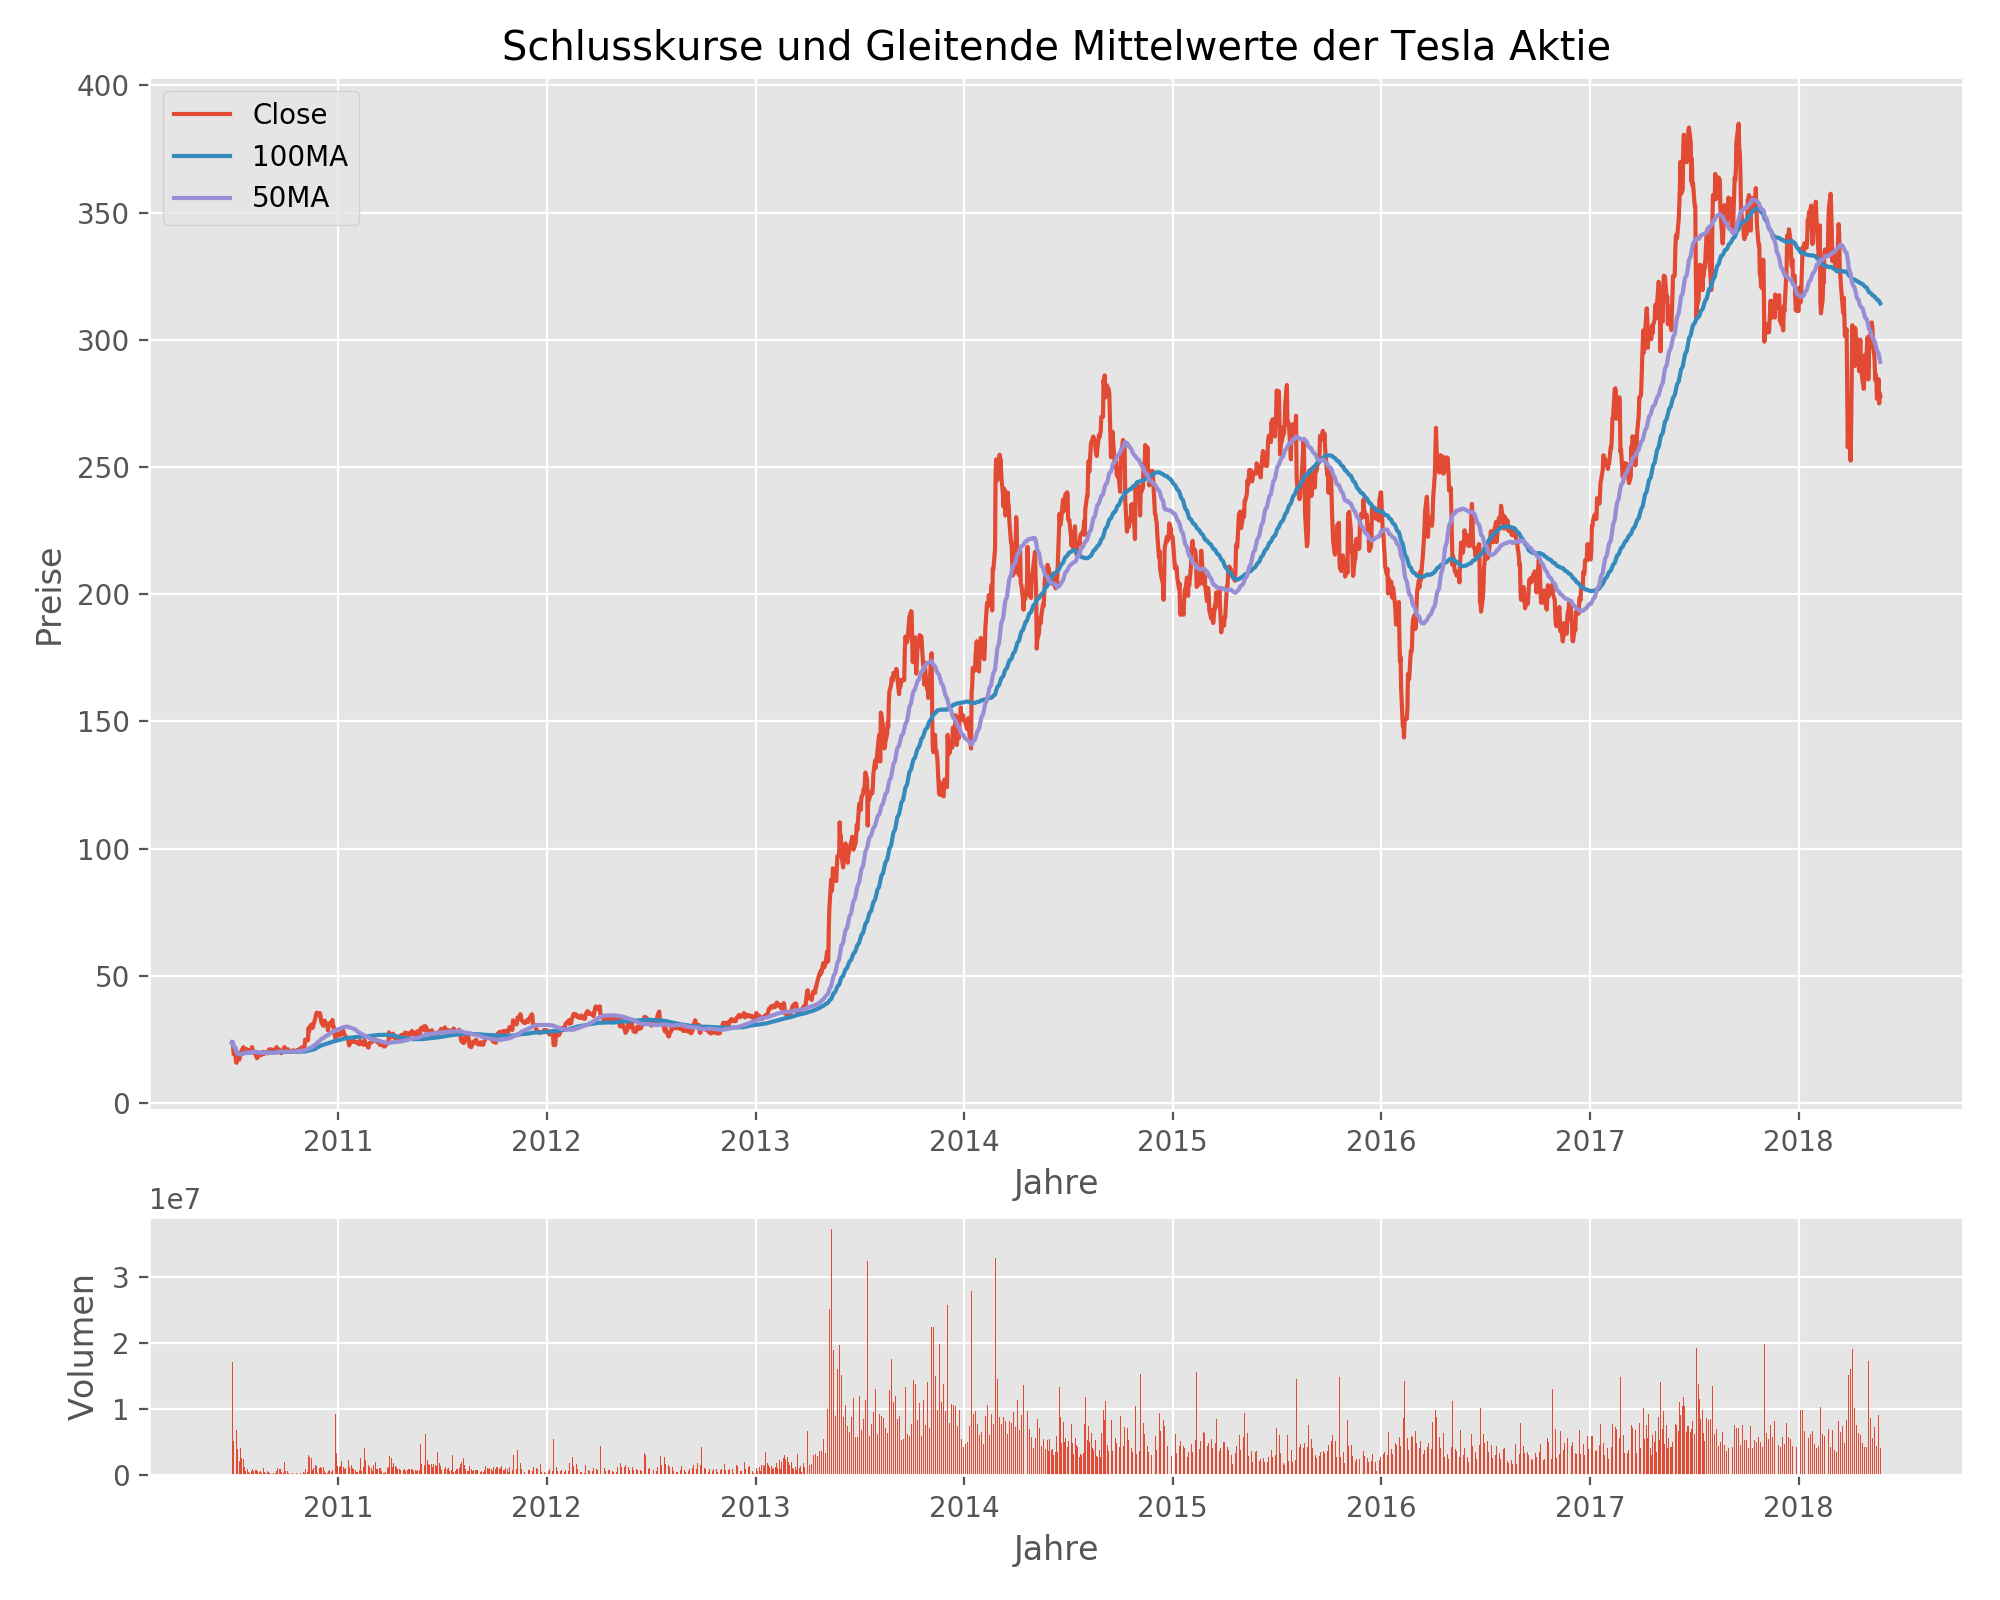

In [20]:
f, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[4, 1]}, figsize=(10, 8), sharex = True)
ax0.plot(df.index, df['Close'])
ax0.plot(df.index, df['100MA'])
ax0.plot(df.index, df['50MA'])
ax0.legend()
ax0.set_title('Schlusskurse und Gleitende Mittelwerte der Tesla Aktie')
ax0.set_ylabel('Preise')
ax0.set_xlabel('Jahre')
ax1.bar(df.index, df['Volume'])
ax1.set_ylabel('Volumen')
ax1.set_xlabel('Jahre')

f.tight_layout()
ax0.xaxis.set_tick_params(labelbottom=True)



  In den obigen Liniendiagramm ist die Entwicklung des Schlusskurses der Tesla Aktie und der gleitenden Durchschnitte von Mitte 2010 bis Anfang 2018 abgebildet.
Ein Beispiel für ein Kaufsignal ist der Zeitraum von Anfang 2017 als der kurzfristige Durchschnitt (die lilane Linie) den langfristigen Durchschnitt (die blaue Linie) kreuzt und darüber ansteigt.   

Von 2010 bis 2013 stagnierte der Kurs der Tesla Aktie zwischen 30-40 Dollar. Erst ab dem Jahr 2013 kam es zu einem rapiden Anstieg des Aktienkurses. Zu einem verzeichnete Tesla am Anfang 2013 das erste profitable Quartalsjahr und zum anderen 
beglichten sie ihre Schulden in Höhe von 400 Millionen Dollar an den Staat.  
Das nächstgrößere Wachstum erreichte Tesla im Jahre 2017 mit der Ankündigung und Auslieferung der Tesla 3 Modelle, das erste elektrische Auto konzipiert für den Massenmarkt mit einem relativ bezahlbaren Preis von 35.000 Dollar.

### Was sind Candlestick-Charts?

Die Spanne zwischen Eröffnungs- und Schlusskurs wird als kleines Rechteck (Körper) dargestellt. Dieses ist grün, wenn der Schlusskurs über dem Eröffnungskurs liegt bzw. rot, wenn der Schlusskurs darunter liegt.
Je nachdem welche der beiden Kurse größer ist wird noch ein Strich über/unter des Rechtecks bis zum Hoch/Tief gezeichnet.

Vorteile:
-  Informationen über open, high, low, close.
-  Durch die Länge der Candle kann die Volatilität abgelesen werden.

In [9]:
#openhighlowclose (mean(), sum(), ohlc)
df_ohlc = df['Close'].resample('10D').ohlc()

df_volume = df['Volume'].resample('10D').sum()

# Convert datetime objects to matplotlib.dates
df_ohlc.reset_index(inplace = True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

<IPython.core.display.Javascript object>


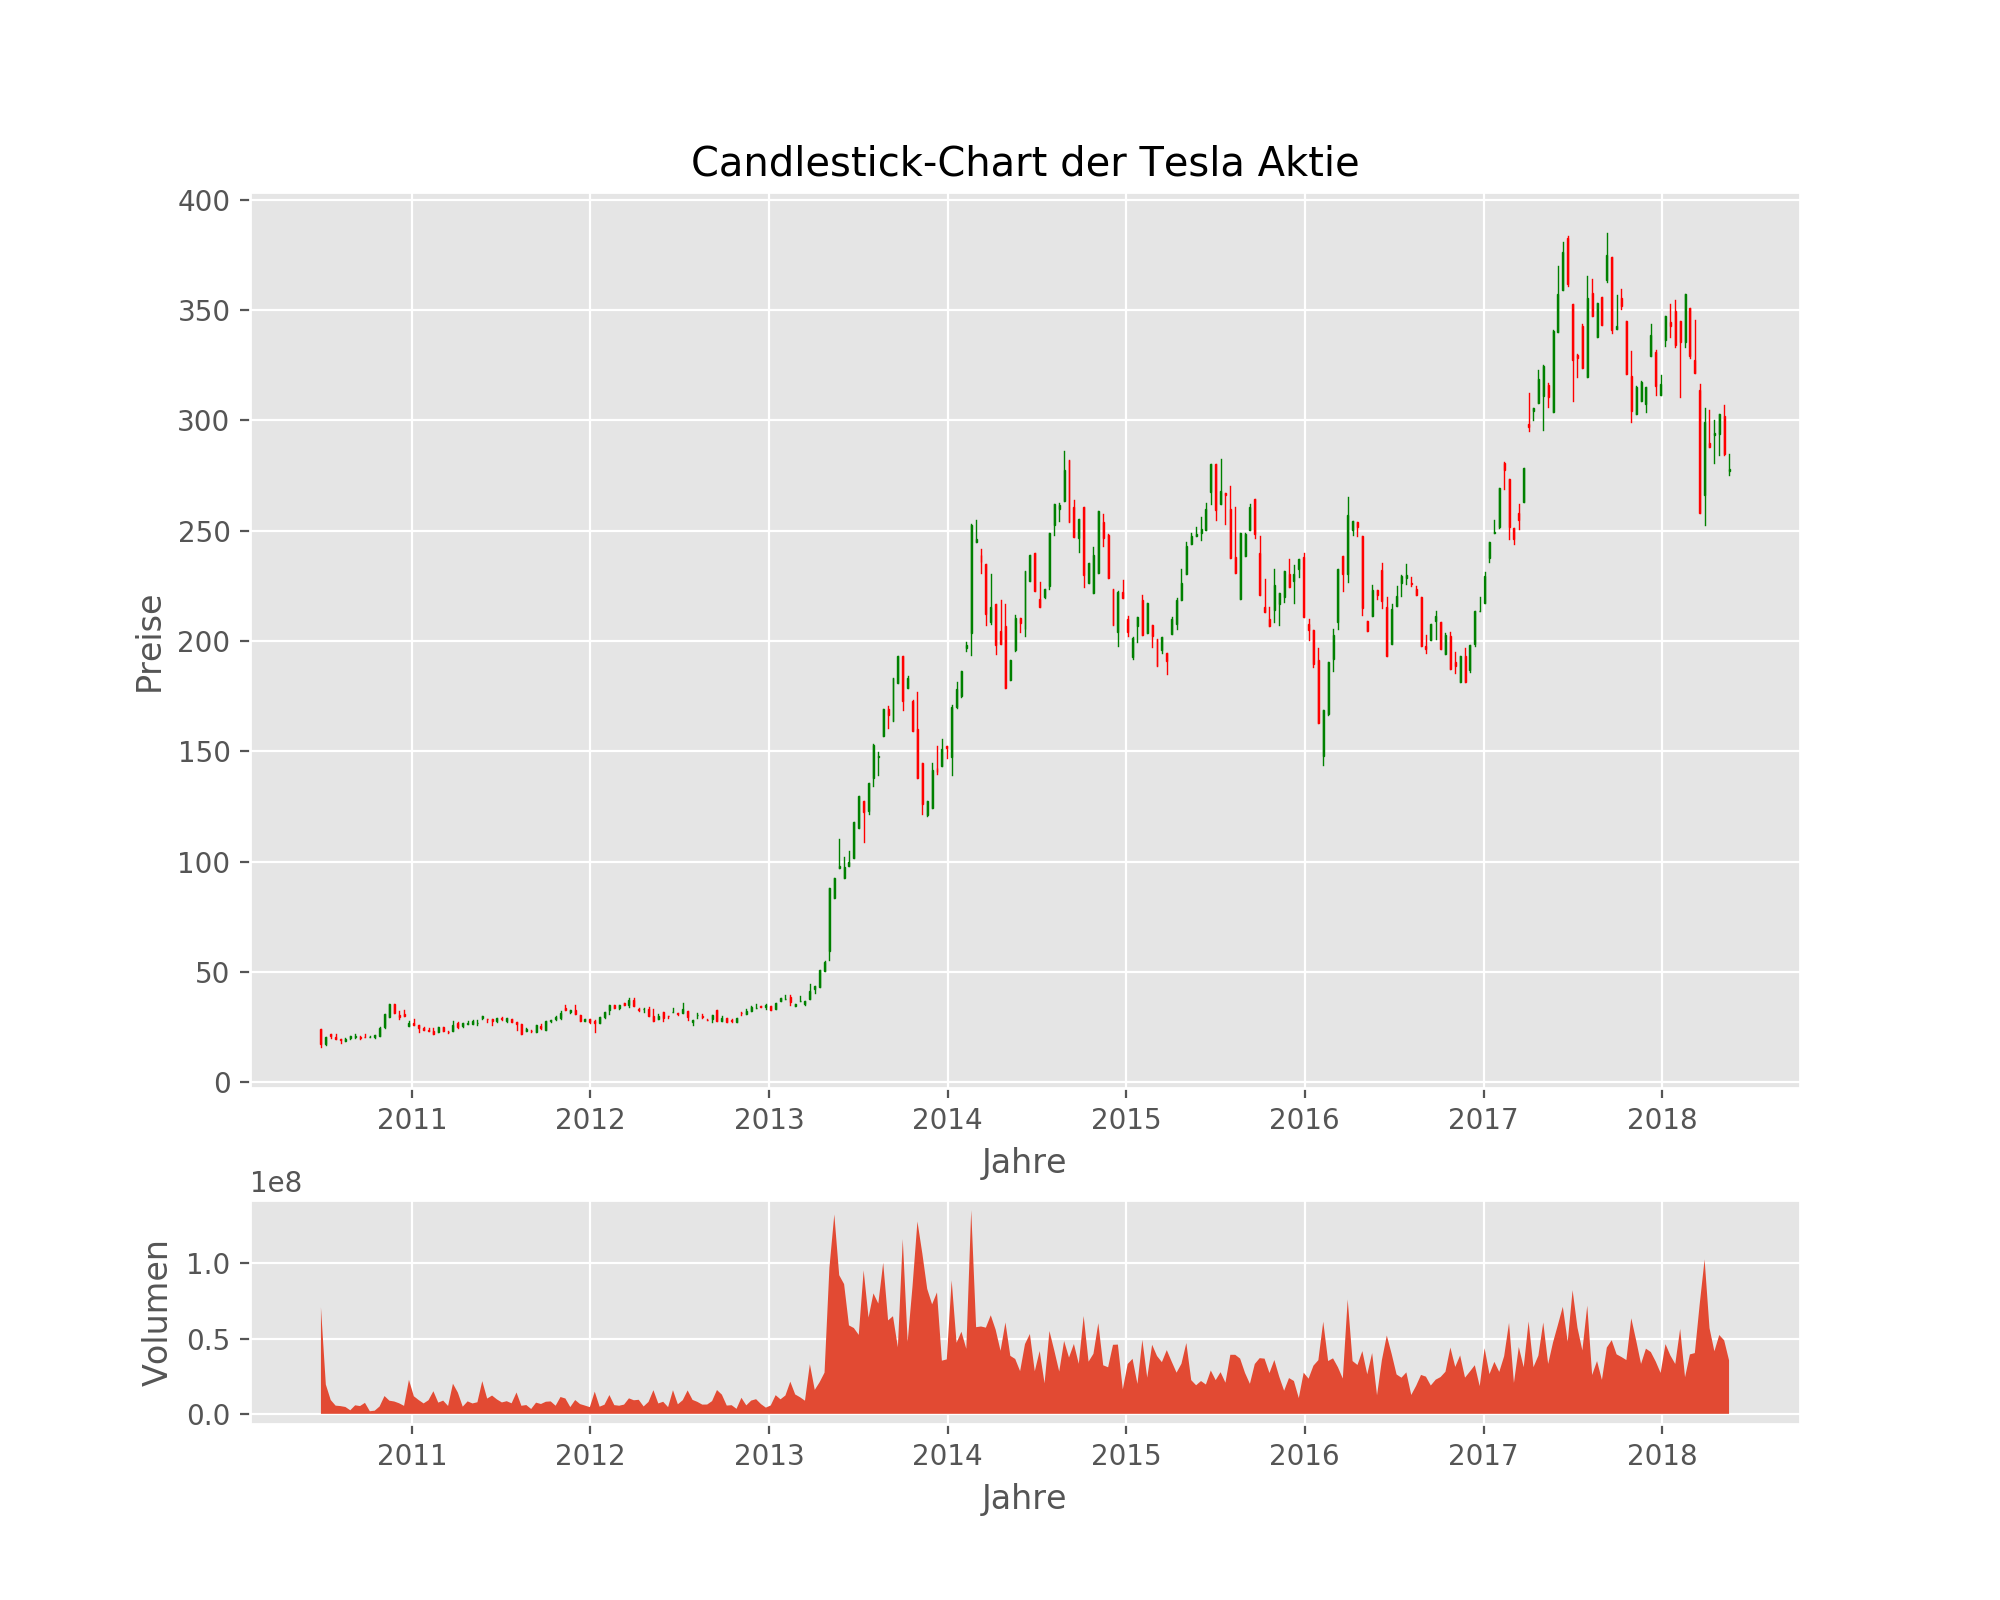

In [24]:
f, (ax0, ax1) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[4, 1]}, figsize=(10, 8), sharex = True)
ax0.xaxis_date()
candlestick_ohlc(ax0, df_ohlc.values, width = 2, colorup = 'g')
ax1.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
ax0.set_title('Candlestick-Chart der Tesla Aktie')
ax0.set_ylabel('Preise')
ax0.set_xlabel('Jahre')
ax1.set_ylabel('Volumen')
ax1.set_xlabel('Jahre')


ax0.xaxis.set_tick_params(labelbottom=True)